In [1]:
import pandas as pd
import plotly.express as px
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

id  var1  var2  var3   var4  var5  var6  var7  var8  var9  var10  var11  \
0   1    18    19  2853  29442  1386  2435    35  -999     3     63   6498   
1   8     4   110  1986  13684  7189  -999  -999    17     3     63  13989   
2  30     0    39  1019  10232   678   791    16  -999     3     63   9739   
3  43    20    39  1751   2689  8235  1042    13    10     1     14   2890   
4  46     7    44  2262  29428  6031   304    16  -999     3     63  13541   

   var12  var13  var14  var15  var16  var17  var18  var19  var20  var21  \
0   1166   2007     26     13     11     11      4   1547     26   2068   
1    497   2289     16      1      3      3      3   1797     16   2417   
2    562    641     10     34     34     10      4    511     10    664   
3   6541    811      8     59     60     23      5    624      8    839   
4   7238    260     10     55     56     20      5   1413     10    270   

   var22  var23  var24  var25  var26  var27  var28  var29  var30  var31  \
0      1      3      0      4      7      0     24      4      2      0   
1      5      1      2      1      6      1      4      2      1      0   
2      5      3      2      1      7      0      3      4      1      0   
3      0      0      0      0      1      1     19      1      2      0   
4      2      3      2      1      8      1      3      4      1      0   

   var32  var33  var34  var35  var36  var37  var38  var39  var40  var41  \
0     16      3     44    463     27      2      0      4      9      3   
1     14      0      1    532      2      1      0      4      7      3   
2     11      1      3     81     26      3      0      4      3      3   
3      8      0     11    414     27      0      0      4     10      3   
4     17      4      3    567      8      3      2      4      5      3   

   var42  var43  var44  var45  var46  var47  var48  var49  var50  var51  \
0     25      6      1      4      3      1      0      0      0      0   
1     30      3      0      0      0      0      0      0      0      0   
2     23      5      1      0      0      0      0      0      0      0   
3     22     10      1      1      1      0      1      1      0      0   
4     26      5      1      0      0      0      0      1      0      0   

   var52  var53  var54     var55  var56     var57     var58     var59  \
0     42      1      1  0.212414  0.137  0.833333  0.037822  0.058070   
1     20      1      1  0.228784  0.308  0.305376  0.069325  0.248909   
2     12      1      1  0.204636  0.213  0.451613  0.018639  0.214520   
3     36      1      1  0.208299  0.716  0.101075  0.204753  0.349421   
4     19      1      1  0.222896  0.596  0.101075  0.140394  0.189641   

        var60       var61     var62     var63     var64       var65  \
0    0.311441    0.142303  0.056146  0.632694  0.024054    0.253356   
1 -999.000000 -999.000000  0.070991  0.773966  0.019315 -999.000000   
2 -999.000000    0.200814  0.051046  0.980827  0.018536 -999.000000   
3 -999.000000    0.352379  0.044301  0.951564  0.023684    0.363370   
4    0.021226    0.226161  0.059125  0.906155  0.020733 -999.000000   

       var66     var67     var68  y  
0    0.00603  0.132353  0.139706  1  
1 -999.00000  0.147059  0.106618  0  
2 -999.00000  0.382353  0.242647  0  
3    0.00201  0.147059  0.132353  0  
4 -999.00000  0.455882  0.132353  1

In [4]:
df.dtypes[0:5]

id      int64
var1    int64
var2    int64
var3    int64
var4    int64
dtype: object

In [5]:
## verificando tipo dos dados
df.dtypes.value_counts()

int64      56
float64    14
dtype: int64

In [6]:
# verificando o corpo das varíaveis
df.describe().round(2)

id      var1      var2      var3      var4      var5      var6  \
count  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00   
mean   17474.65      9.71     23.97   1584.67  15179.18   5543.70   1315.31   
std    10249.07      7.27    218.43   1118.10   9994.30   3329.49   1210.07   
min        1.00      0.00   -999.00   -999.00   -999.00      0.00   -999.00   
25%     8550.50      4.00     38.00    731.00   6493.50   2374.00    482.00   
50%    17464.00      5.00     53.00   1461.00  15309.00   6159.00   1558.00   
75%    26358.50     18.00    110.00   2481.00  23818.00   8594.00   2438.00   
max    35306.00     30.00    129.00   3546.00  32403.00  11373.00   3001.00   

           var7      var8      var9     var10     var11     var12    var13  \
count  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00  14123.0   
mean    -109.71   -138.43   -106.36   -118.99  13342.30   3430.08   1355.4   
std      350.20    371.13    311.61    392.41   9849.81   3079.90    642.8   
min     -999.00   -999.00   -999.00   -999.00   -999.00   -999.00      0.0   
25%       16.00     10.00      1.00     14.00   4525.50    914.00    811.0   
50%       33.00     24.00      3.00     63.00  13232.00   3213.00   1387.0   
75%       35.00     27.00      3.00     63.00  21839.50   6229.00   2008.0   
max       36.00     28.00      3.00     85.00  30859.00   8800.00   2299.0   

          var14     var15     var16     var17     var18     var19     var20  \
count  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00   
mean      19.48    -65.83    -65.18    -84.42    -93.52   1059.04     19.79   
std        7.51    307.50    307.69    300.50    297.39    537.38      7.59   
min        0.00   -999.00   -999.00   -999.00   -999.00      0.00      0.00   
25%       13.00      2.00      3.00      3.00      3.00    586.00     13.00   
50%       24.00     28.00     32.00     10.00      4.00   1245.00     26.00   
75%       26.00     58.00     58.00     22.00      5.00   1573.00     26.00   
max       27.00     78.00     78.00     32.00      6.00   1803.00     27.00   

          var21     var22     var23     var24     var25     var26     var27  \
count  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00   
mean    1394.82      3.48      2.53      0.96      2.09   -106.19      0.37   
std      688.87      1.81      1.11      0.92      1.39    315.88      0.48   
min        1.00      0.00      0.00      0.00      0.00   -999.00      0.00   
25%      796.00      2.00      2.00      0.00      1.00      1.00      0.00   
50%     1445.00      5.00      3.00      1.00      2.00      5.00      0.00   
75%     2093.00      5.00      3.00      2.00      4.00      7.00      1.00   
max     2436.00      5.00      4.00      2.00      4.00     10.00      1.00   

          var28     var29     var30     var31     var32     var33     var34  \
count  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00   
mean      19.24      3.64      1.39      0.04     13.71      3.14     26.60   
std        8.28      1.06      0.56      0.19      4.95      1.99     18.79   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%       15.00      4.00      1.00      0.00     10.00      1.00     10.00   
50%       24.00      4.00      1.00      0.00     14.00      3.00     25.00   
75%       24.00      4.00      2.00      0.00     18.00      5.00     44.00   
max       27.00      5.00      2.00      1.00     23.00      6.00     68.00   

          var35     var36     var37     var38     var39     var40     var41  \
count  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00  14123.00   
mean     394.26     14.33      7.59      1.87      3.59      6.01      3.10   
std      181.87     12.48      8.72      4.07      1.01      4.78      1.03   
min        1.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%      255.00      2.00      1.00      0.00      4.00      2.00  

In [7]:
#verificando se possuem valores nulos, inválidos ou faltantes
df.isna().sum()[0:5]

id      0
var1    0
var2    0
var3    0
var4    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14123 non-null  int64  
 1   var1    14123 non-null  int64  
 2   var2    14123 non-null  int64  
 3   var3    14123 non-null  int64  
 4   var4    14123 non-null  int64  
 5   var5    14123 non-null  int64  
 6   var6    14123 non-null  int64  
 7   var7    14123 non-null  int64  
 8   var8    14123 non-null  int64  
 9   var9    14123 non-null  int64  
 10  var10   14123 non-null  int64  
 11  var11   14123 non-null  int64  
 12  var12   14123 non-null  int64  
 13  var13   14123 non-null  int64  
 14  var14   14123 non-null  int64  
 15  var15   14123 non-null  int64  
 16  var16   14123 non-null  int64  
 17  var17   14123 non-null  int64  
 18  var18   14123 non-null  int64  
 19  var19   14123 non-null  int64  
 20  var20   14123 non-null  int64  
 21  var21   14123 non-null  int64  
 22

In [9]:
##verificando as variável target

In [10]:
df.y.describe().round(3)

count    14123.000
mean         0.202
std          0.401
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: y, dtype: float64

In [11]:
# Variável Binária e desbalanceada
df.y.value_counts()

0    11273
1     2850
Name: y, dtype: int64

In [12]:
def descricao_univar(df: pd.DataFrame, coluna: str) ->None:
    '''
        Função que recebe como parâmetro dataframe e retorna as descrições univaríaveis
    '''
    try:
        print(f'Média da variável no dataframe: {df[coluna].mean()}')
        print(f'Desvio Padrão da variável no dataframe: {df[coluna].std()}')
        print(f'Verificando a variável em relação a curva normal: {df[coluna].skew()}')
        print(f'Verificando variável em relação a altura na curva normal: {df[coluna].kurtosis()}')
        print(f'Verificando corpo da variável no dataframe: {df[coluna].describe()}')
        fig = px.histogram(df, x=coluna,title=f'Histograma da {coluna}')
        fig.show()
        print(f'_____________******FIM DA VARIAVEL*****________________\n')
    except Error as e:
        print('Coluna não encontrada no dataframe')

In [13]:
for coluna in df.columns.to_list()[1:5]:
    descricao_univar(df,coluna)


Média da variável no dataframe: 9.712667280322878
Desvio Padrão da variável no dataframe: 7.269558510611607
Verificando a variável em relação a curva normal: 0.5507273937383501
Verificando variável em relação a altura na curva normal: -1.3842285828760361
Verificando corpo da variável no dataframe: count    14123.000000
mean         9.712667
std          7.269559
min          0.000000
25%          4.000000
50%          5.000000
75%         18.000000
max         30.000000
Name: var1, dtype: float64


_____________******FIM DA VARIAVEL*****________________

Média da variável no dataframe: 23.966579338667422
Desvio Padrão da variável no dataframe: 218.4296642274599
Verificando a variável em relação a curva normal: -4.328587538065345
Verificando variável em relação a altura na curva normal: 17.42547760385118
Verificando corpo da variável no dataframe: count    14123.000000
mean        23.966579
std        218.429664
min       -999.000000
25%         38.000000
50%         53.000000
75%        110.000000
max        129.000000
Name: var2, dtype: float64


_____________******FIM DA VARIAVEL*****________________

Média da variável no dataframe: 1584.6712454860865
Desvio Padrão da variável no dataframe: 1118.101765130006
Verificando a variável em relação a curva normal: -0.12127857642004113
Verificando variável em relação a altura na curva normal: -0.589888223046624
Verificando corpo da variável no dataframe: count    14123.000000
mean      1584.671245
std       1118.101765
min       -999.000000
25%        731.000000
50%       1461.000000
75%       2481.000000
max       3546.000000
Name: var3, dtype: float64


_____________******FIM DA VARIAVEL*****________________

Média da variável no dataframe: 15179.176024923883
Desvio Padrão da variável no dataframe: 9994.295222628429
Verificando a variável em relação a curva normal: -0.013927725719575396
Verificando variável em relação a altura na curva normal: -1.2070119928841245
Verificando corpo da variável no dataframe: count    14123.000000
mean     15179.176025
std       9994.295223
min       -999.000000
25%       6493.500000
50%      15309.000000
75%      23818.000000
max      32403.000000
Name: var4, dtype: float64


_____________******FIM DA VARIAVEL*****________________



In [14]:
#Verificando correlações
df.corr().head()

id      var1      var2      var3      var4      var5      var6  \
id    1.000000 -0.018434 -0.032169 -0.004065  0.006869 -0.000622 -0.005410   
var1 -0.018434  1.000000  0.000073 -0.034189 -0.051234  0.002662 -0.035333   
var2 -0.032169  0.000073  1.000000  0.500884  0.050235 -0.018062  0.113457   
var3 -0.004065 -0.034189  0.500884  1.000000  0.011360 -0.016962  0.049559   
var4  0.006869 -0.051234  0.050235  0.011360  1.000000 -0.028791  0.257356   

          var7      var8      var9     var10     var11     var12     var13  \
id   -0.023912  0.003889 -0.005181 -0.003056  0.005097 -0.007618  0.013667   
var1 -0.038974  0.111272 -0.027785 -0.029723 -0.014195 -0.025948 -0.010720   
var2  0.154596  0.480245  0.174923  0.131737  0.077898  0.068059 -0.008729   
var3  0.076763  0.235441  0.070726  0.050665  0.018918  0.031122 -0.024391   
var4  0.326731 -0.078838  0.303774  0.302069  0.480280  0.171559  0.007044   

         var14     var15     var16     var17     var18     var19     var20  \
id   -0.004347 -0.003030 -0.002978 -0.003491 -0.003709  0.001593 -0.005115   
var1 -0.036898 -0.038475 -0.038562 -0.038459 -0.038298 -0.012741 -0.039428   
var2  0.050288  0.185515  0.185548  0.185990  0.186175 -0.006374  0.048022   
var3 -0.004652  0.068111  0.068116  0.068637  0.068943 -0.016078 -0.006141   
var4  0.164378  0.319902  0.319918  0.319168  0.318351  0.005940  0.174725   

         var21     var22     var23     var24     var25     var26     var27  \
id    0.021732 -0.002731  0.003877 -0.007084  0.008683  0.009957 -0.005840   
var1 -0.009918 -0.004539 -0.024651 -0.011084  0.006293 -0.032907 -0.014635   
var2 -0.006189 -0.052511  0.056717  0.004108 -0.010945  0.171776  0.049892   
var3 -0.014312 -0.038031  0.005438 -0.003722 -0.007826  0.062865  0.041714   
var4  0.013125 -0.052657  0.240306  0.001401  0.018543  0.300225  0.067358   

         var28     var29     var30     var31     var32     var33     var34  \
id   -0.018651  0.008141 -0.012403 -0.003110  0.011361  0.009266 -0.006049   
var1 -0.032812 -0.014021  0.005983  0.007734 -0.010212  0.008516 -0.047189   
var2 -0.003784 -0.020348 -0.016663 -0.001478 -0.002673  0.013095 -0.006386   
var3 -0.012836 -0.023824 -0.008215 -0.011534  0.003903  0.014406  0.000816   
var4  0.016323  0.082172  0.005547 -0.011257  0.011897  0.000449  0.025599   

         var35     var36     var37     var38     var39     var40     var41  \
id   -0.001769 -0.005496  0.009835 -0.005938 -0.003753 -0.007492  0.000979   
var1  0.012493  0.003304 -0.011186  0.066855 -0.044921 -0.053054 -0.001578   
var2 -0.015531 -0.003814 -0.007432 -0.002553 -0.005071 -0.002991  0.023171   
var3 -0.017260  0.005195 -0.002445 -0.009219 -0.002687  0.007151  0.013069   
var4  0.016532  0.000369  0.008156 -0.016002  0.034126  0.007831  0.014635   

         var42     var43     var44     var45     var46     var47     var48  \
id    0.006294 -0.012816 -0.011301 -0.003131 -0.002156 -0.005566 -0.011512   
var1  0.020797 -0.003867 -0.011422  0.007900  0.005909  0.007249  0.001527   
var2 -0.016177  0.009685  0.001340  0.033079  0.033325  0.009810  0.020434   
var3 -0.013769  0.015309  0.006175  0.039218  0.039943  0.014692  0.029474   
var4  0.027355 -0.009856  0.007239  0.010748  0.006867  0.017250  0.006410   

         var49     var50     var51     var52     var53     var54     var55  \
id    0.005172 -0.001991 -0.007542 -0.005604 -0.009394 -0.015539 -0.002203   
var1 -0.002159  0.102957  0.056356 -0.026940 -0.020687 -0.006862  0.002586   
var2  0.047082  0.078012  0.072522  0.175937  0.138774  0.148881  0.008869   
var3  0.032697 -0.146986 -0.059053  0.073445  0.059540  0.066451  0.012856   
var4  0.051543 -0.009974  0.018737  0.302294  0.236423  0.221549 -0.020367   

         var56     var57     var58     var59     var60     var61     var62  \
id   -0.005601 -0.005833  0.009939 -0.012827  0.002493 -0.006964 -0.003878   
var1 -0.024431 -0.024549 -0.032787 -0.027400 -0.017277 -0.011731 -0.019876   
var2  0.173801  0.173669  

In [15]:
#Plotando o heatmap com as correlações
def heat_map_corr(df: pd.DataFrame)-> None:
    '''
        Função para receber as correlações
    '''
    f = plt.figure(figsize=(30, 30))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=20, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=20)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=60);

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)


In [17]:
def excluindo_colunas(df: pd.DataFrame, coluna: list)->pd.DataFrame:
    '''
        Função para excluir colunas do dataframe passando como parâmetro o nome da coluna. 
    '''
    return df.drop(coluna,axis=1,inplace=True)

In [18]:
df_corr = df.copy()
excluindo_colunas(df_corr, ['var16','var17','var18','var52','var56','var65'])
df_corr.head()


id  var1  var2  var3   var4  var5  var6  var7  var8  var9  var10  var11  \
0   1    18    19  2853  29442  1386  2435    35  -999     3     63   6498   
1   8     4   110  1986  13684  7189  -999  -999    17     3     63  13989   
2  30     0    39  1019  10232   678   791    16  -999     3     63   9739   
3  43    20    39  1751   2689  8235  1042    13    10     1     14   2890   
4  46     7    44  2262  29428  6031   304    16  -999     3     63  13541   

   var12  var13  var14  var15  var19  var20  var21  var22  var23  var24  \
0   1166   2007     26     13   1547     26   2068      1      3      0   
1    497   2289     16      1   1797     16   2417      5      1      2   
2    562    641     10     34    511     10    664      5      3      2   
3   6541    811      8     59    624      8    839      0      0      0   
4   7238    260     10     55   1413     10    270      2      3      2   

   var25  var26  var27  var28  var29  var30  var31  var32  var33  var34  \
0      4      7      0     24      4      2      0     16      3     44   
1      1      6      1      4      2      1      0     14      0      1   
2      1      7      0      3      4      1      0     11      1      3   
3      0      1      1     19      1      2      0      8      0     11   
4      1      8      1      3      4      1      0     17      4      3   

   var35  var36  var37  var38  var39  var40  var41  var42  var43  var44  \
0    463     27      2      0      4      9      3     25      6      1   
1    532      2      1      0      4      7      3     30      3      0   
2     81     26      3      0      4      3      3     23      5      1   
3    414     27      0      0      4     10      3     22     10      1   
4    567      8      3      2      4      5      3     26      5      1   

   var45  var46  var47  var48  var49  var50  var51  var53  var54     var55  \
0      4      3      1      0      0      0      0      1      1  0.212414   
1      0      0      0      0      0      0      0      1      1  0.228784   
2      0      0      0      0      0      0      0      1      1  0.204636   
3      1      1      0      1      1      0      0      1      1  0.208299   
4      0      0      0      0      1      0      0      1      1  0.222896   

      var57     var58     var59       var60       var61     var62     var63  \
0  0.833333  0.037822  0.058070    0.311441    0.142303  0.056146  0.632694   
1  0.305376  0.069325  0.248909 -999.000000 -999.000000  0.070991  0.773966   
2  0.451613  0.018639  0.214520 -999.000000    0.200814  0.051046  0.980827   
3  0.101075  0.204753  0.349421 -999.000000    0.352379  0.044301  0.951564   
4  0.101075  0.140394  0.189641    0.021226    0.226161  0.059125  0.906155   

      var64      var66     var67     var68  y  
0  0.024054    0.00603  0.132353  0.139706  1  
1  0.019315 -999.00000  0.147059  0.106618  0  
2  0.018536 -999.00000  0.382353  0.242647  0  
3  0.023684    0.00201  0.147059  0.132353  0  
4  0.020733 -999.00000  0.455882  0.132353  1

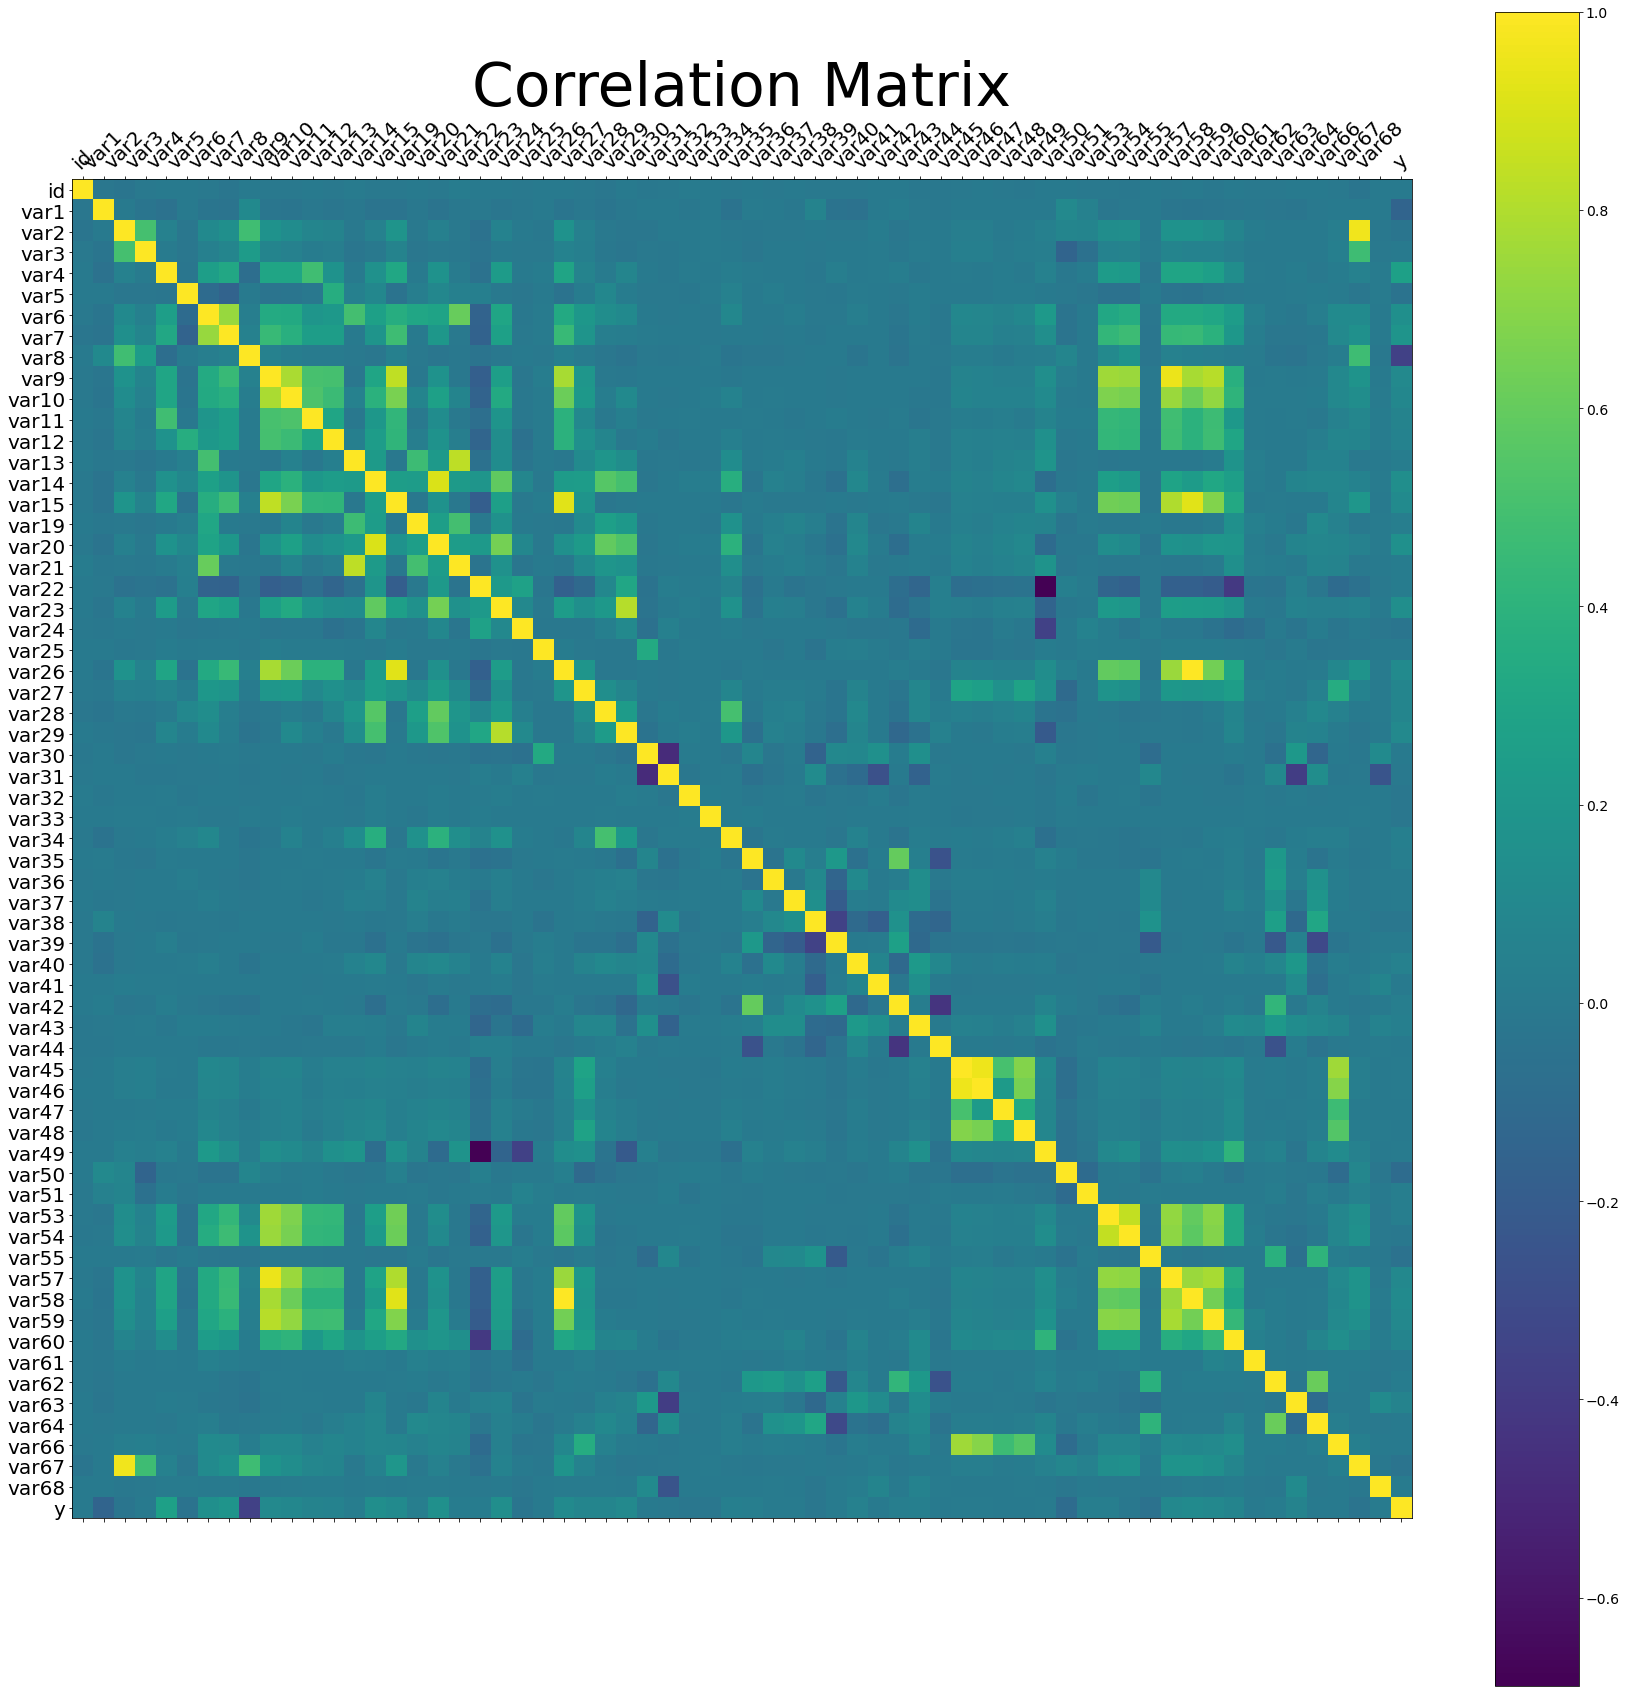

In [19]:
heat_map_corr(df_corr)

In [20]:
for coluna in df_corr.columns.to_list()[1:5]:
    print(df[coluna].value_counts()[0:5])
    print(f'______________******* {coluna}****** __________________')

4     5148
18    2577
19    1237
2     1058
7      952
Name: var1, dtype: int64
______________******* var1****** __________________
126    2558
38     2239
53     1998
44     1701
39     1275
Name: var2, dtype: int64
______________******* var2****** __________________
-999     599
 1446    283
 568     139
 839     138
 2480    104
Name: var3, dtype: int64
______________******* var3****** __________________
-999      936
 976        4
 29895      3
 15576      3
 3924       3
Name: var4, dtype: int64
______________******* var4****** __________________


In [21]:
#Agrupando pela variável Target a media
df_corr.groupby('y').mean()

id       var1       var2         var3          var4         var5  \
y                                                                               
0  17485.464739  10.241639  27.541737  1585.789320  13833.990153  5616.433248   
1  17431.869825   7.620351   9.825263  1580.248772  20499.976140  5255.997544   

          var6        var7        var8        var9       var10         var11  \
y                                                                              
0  1223.456666 -142.214672  -70.958574 -123.128803 -137.851237  13002.412401   
1  1678.650877   18.841754 -405.292632  -40.043860  -44.369123  14686.703860   

         var12        var13      var14      var15        var19      var20  \
y                                                                           
0  3333.626098  1346.970283  18.942518 -84.066087  1050.070789  19.194802   
1  3811.603158  1388.720702  21.610877   6.296491  1094.510175  22.162456   

         var21     var22     var23     var24     var25       var26     var27  \
y                                                                              
0  1386.827996  3.459771  2.450191  0.975073  2.086845 -125.417812  0.351282   
1  1426.434035  3.552982  2.860000  0.893684  2.118246  -30.115088  0.444211   

       var28     var29     var30     var31      var32     var33      var34  \
y                                                                            
0  18.907212  3.588841  1.384370  0.036814  13.763949  3.159585  26.218930   
1  20.543860  3.862807  1.396842  0.034737  13.518947  3.072281  28.124211   

        var35      var36     var37     var38     var39     var40     var41  \
y                                                                            
0  391.397410  14.257873  7.529761  1.908631  3.585115  5.889648  3.097223   
1  405.558246  14.621053  7.806667  1.702456  3.621754  6.487719  3.094386   

       var42     var43     var44     var45     var46     var47     var48  \
y                                                                          
0  24.684911  6.776546  0.865608  0.269050  0.217156  0.048612  0.104586   
1  24.943158  7.165614  0.866316  0.299649  0.239298  0.054737  0.111930   

      var49     var50     var51     var53     var54     var55       var57  \
y                                                                           
0  0.340814  0.164907  0.051096  1.622372  1.523374  0.216608 -128.360308   
1  0.355088  0.082807  0.071930  1.686316  1.502807  0.213748  -47.744317   

        var58       var59       var60      var61     var62     var63  \
y                                                                      
0 -130.168749 -172.531943 -476.131245 -24.990071  0.072522  0.771497   
1  -35.288825  -81.480500 -388.960595 -21.125933  0.075316  0.809769   

      var64       var66      var67     var68  
y                                             
0  0.028726 -863.943900 -37.639650 -2.479435  
1  0.028984 -858.087618 -55.544407 -0.870853

In [22]:
#Agrupando pela variável Target e verificando o desvio padrão
df_corr.groupby('y').std()

id      var1        var2         var3          var4         var5  \
y                                                                               
0  10277.549599  7.375882  210.145420  1114.521992   9407.263440  3314.374355   
1  10137.295074  6.420101  248.041925  1132.337027  10464.310062  3373.887370   

          var6        var7        var8        var9       var10        var11  \
y                                                                             
0  1261.387160  381.345487  292.651692  331.583988  408.502703  9951.934894   
1   893.086057  108.783454  504.607564  201.962015  309.946970  9315.922915   

         var12       var13     var14       var15       var19     var20  \
y                                                                        
0  3111.519069  635.595897  7.574229  330.990698  537.745455  7.694037   
1  2920.978609  669.610535  6.859096  169.516415  534.541426  6.660756   

        var21     var22     var23     var24     var25       var26     var27  \
y                                                                             
0  682.180165  1.861130  1.149038  0.902445  1.373155  338.309213  0.477392   
1  713.974486  1.607339  0.879376  0.963130  1.448441  185.765987  0.496965   

      var28     var29     var30     var31     var32     var33      var34  \
y                                                                          
0  8.390059  1.099442  0.557032  0.188312  4.974909  1.996491  18.966702   
1  7.685349  0.866959  0.555824  0.183145  4.865242  1.976264  18.013626   

        var35      var36     var37     var38     var39     var40     var41  \
y                                                                            
0  181.545570  12.465223  8.718145  4.117334  1.011580  4.771042  1.025640   
1  182.735905  12.556768  8.744942  3.854664  0.984658  4.802088  1.046079   

      var42     var43     var44     var45     var46     var47     var48  \
y                                                                         
0  3.414223  4.033066  0.341088  0.896674  0.787275  0.264293  0.484656   
1  3.495110  4.093580  0.340372  0.982490  0.864006  0.287484  0.498961   

      var49     var50     var51     var53     var54     var55       var57  \
y                                                                           
0  0.474004  0.371113  0.220202  0.770246  0.737571  0.023393  334.783003   
1  0.478624  0.275639  0.258417  0.659612  0.611828  0.019221  213.800809   

        var58       var59       var60       var61     var62     var63  \
y                                                                       
0  336.460353  377.876724  499.081654  156.872175  0.054119  0.237683   
1  184.755135  273.821563  487.327571  144.643852  0.053294  0.216541   

      var64       var66       var67      var68  
y                                               
0  0.019190  341.602485  190.758850  51.478432  
1  0.016518  347.790761  229.371489  32.406375

In [23]:
def bar_plot(df: pd.DataFrame, coluna_X: str, coluna_Y: str)-> None:
    '''
        Função para construir o barplot por variável
    '''
    plt.figure(figsize=(30,30))
    plt.title(f'Média da Variável {coluna_X} x Target')
    sns.barplot(x=coluna_X,y='y', data = df_corr.groupby(coluna_Y)[coluna_X].mean().reset_index())
    plt.xticks(rotation=45)
    plt.show()

In [24]:
def dist_plot(df: pd.DataFrame,coluna: str)-> None:
    '''
        Função para receber as distribuições por variável
    '''
    #f = plt.figure(figsize=(30, 30))
    sns.distplot(df[coluna])
    plt.title(f'Distribuição da variavel {coluna}', fontsize=12)
    plt.show()


In [25]:
def scatter_plot(df: pd.DataFrame,coluna_X: str,coluna_Y: str, hue: str)-> None:
    '''
        Função para receber o scatterplot e agrupar por cor
    '''
    sns.scatterplot(x=coluna_X, y=coluna_Y, hue= hue, data=df)

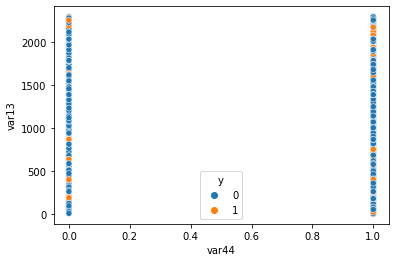

In [26]:
scatter_plot( df, 'var44', 'var13','y')

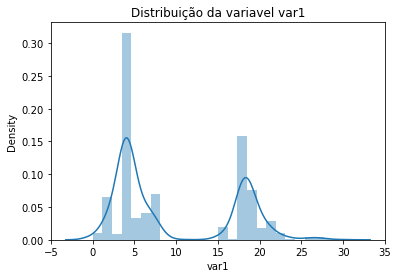

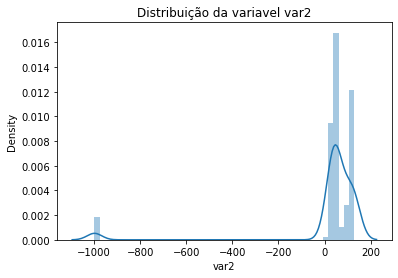

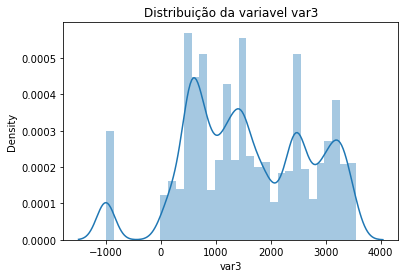

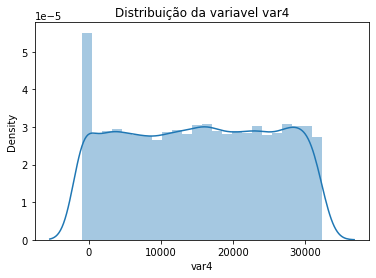

In [27]:
for coluna in df_corr.columns.to_list()[1:5]:
    dist_plot(df,coluna)

## Distribuições

In [28]:
import scipy.stats as sct

In [29]:
def dados_descritivos(df: pd.DataFrame, coluna: str)->None:
    '''
        Função para retornar dados descritíveis da variável
    '''
    print(f'Média da {coluna} : {df[coluna].mean()}')
    print(f'Variância da {coluna} : {df[coluna].var()}')
    print(f'Desvio Padrao da {coluna} : {df[coluna].std()}')



In [30]:
dados_descritivos(df, 'var66')

Média da var66 : -862.7621110001451
Variância da var66 : 117550.1816840343
Desvio Padrao da var66 : 342.8559197156063


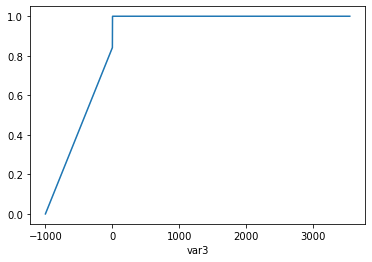

In [31]:
x= df.var3
norm_cdf = sct.norm.cdf(df.var3)
sns.lineplot(x=x, y=norm_cdf)
plt.show()

In [32]:
def cdf_plot(df: pd.DataFrame, coluna: str)->None:
    '''
        Função para retornar CDF das colunas
    '''
    norm_cdf = sct.norm.cdf(df[coluna])
    sns.lineplot(x=df[coluna], y=norm_cdf)
    plt.title(f'Distribuição acumulada da variavel {coluna}', fontsize=12)
    plt.show()



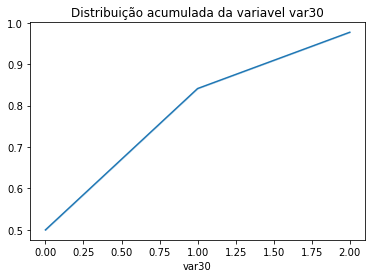

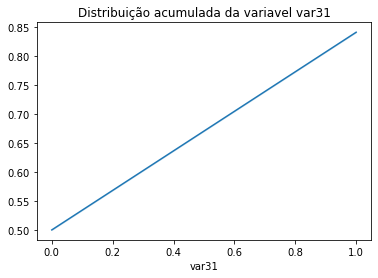

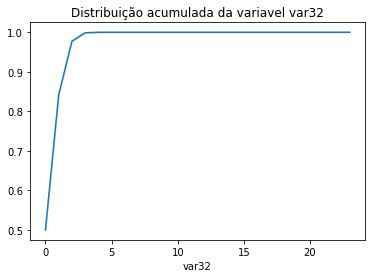

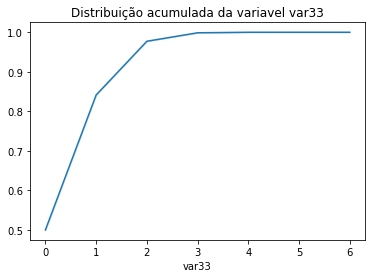

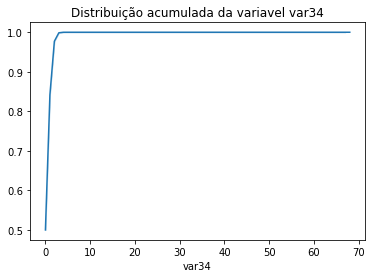

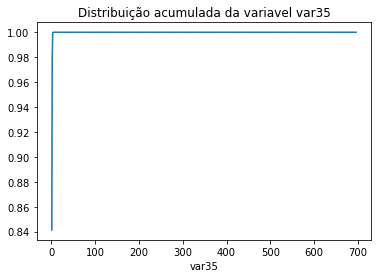

In [33]:
for coluna in df.columns[30:36]:
    cdf_plot(df, coluna)

In [34]:
def pdf_plot(df: pd.DataFrame, coluna: str)->None:
    '''
        Função para retornar CDF das colunas
    '''
    norm_cdf = sct.norm.pdf(df[coluna])
    sns.lineplot(x=df[coluna], y=norm_cdf)
    plt.title(f'Distribuição PDF da variavel {coluna}', fontsize=12)
    plt.show()


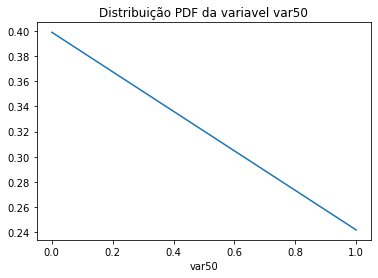

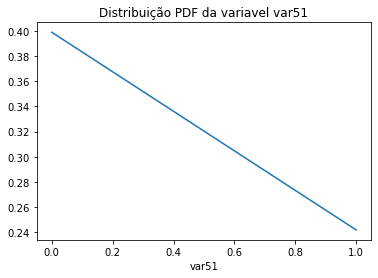

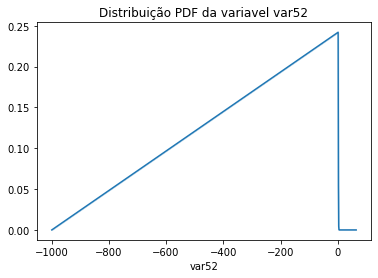

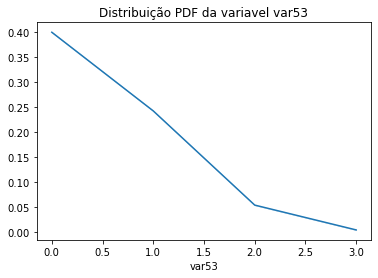

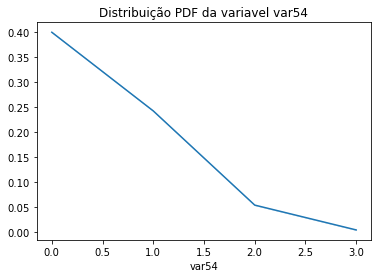

In [35]:
for coluna in df.columns[50:55]:
    pdf_plot(df, coluna)

## Redução de dimensionalidade

In [36]:
from sklearn.decomposition import PCA,IncrementalPCA
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12,8)
sns.set()
df = df_corr.copy()


In [37]:
pca = PCA(n_components=5)
projected = pca.fit_transform(df)
print(f'Original shape:{df.shape} , projected shape: {projected.shape}')

Original shape:(14123, 64) , projected shape: (14123, 5)


<AxesSubplot:>

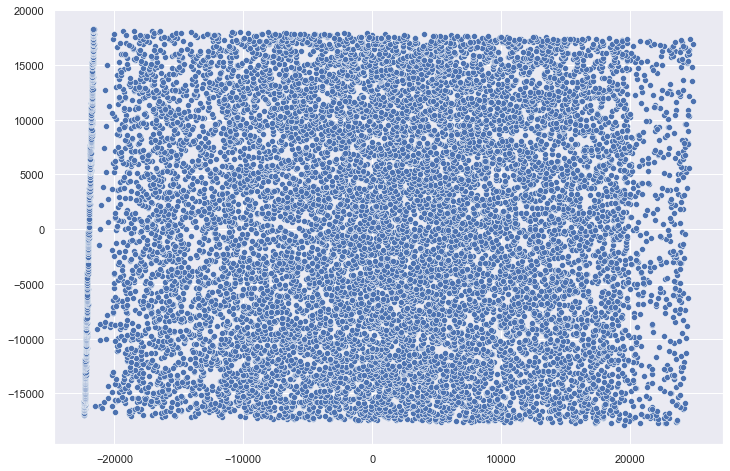

In [38]:
sns.scatterplot(projected[:,0],projected[:,1])

In [39]:
pca = PCA().fit(df)
evr = pca.explained_variance_ratio_
evr

array([4.47705780e-01, 3.20249790e-01, 1.56738785e-01, 4.20000294e-02,
       1.84418766e-02, 5.49810555e-03, 3.90848560e-03, 1.57596320e-03,
       9.53812952e-04, 5.83414647e-04, 5.28110283e-04, 4.38185865e-04,
       3.41975141e-04, 2.34490296e-04, 2.12602005e-04, 1.33284108e-04,
       1.18533816e-04, 1.00538857e-04, 8.22811922e-05, 6.95154703e-05,
       3.16850097e-05, 2.52126301e-05, 1.31503174e-05, 7.07625869e-06,
       4.64622051e-06, 1.13246215e-06, 4.75545856e-07, 2.60967201e-07,
       2.28224525e-07, 1.57956231e-07, 8.90500574e-08, 7.48679566e-08,
       7.45516597e-08, 4.74203836e-08, 3.96335155e-08, 2.13297114e-08,
       1.40383770e-08, 1.20393332e-08, 9.73671081e-09, 7.55051674e-09,
       5.94970531e-09, 3.29664365e-09, 3.06553906e-09, 2.27501921e-09,
       2.14557614e-09, 2.09065647e-09, 9.63943906e-10, 7.74841478e-10,
       5.70497422e-10, 4.52259274e-10, 3.82441990e-10, 3.54365649e-10,
       3.35755392e-10, 2.91854180e-10, 2.79501123e-10, 2.50798588e-10,
      

Text(0, 0.5, 'Cumulative explaneid variance')

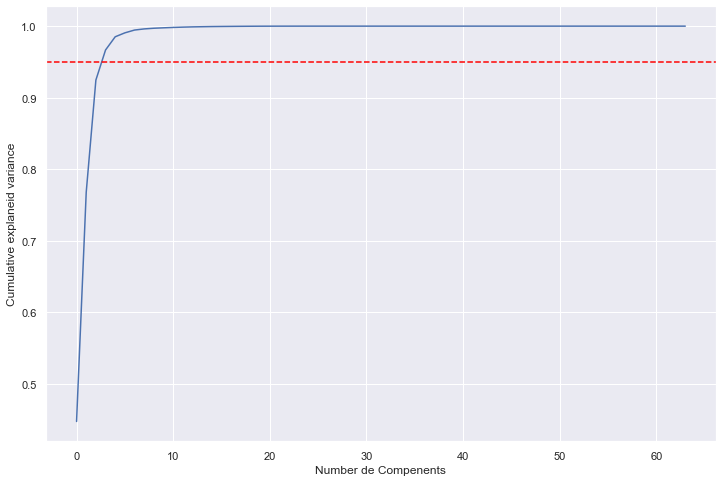

In [40]:
g = sns.lineplot(np.arange(len(evr)),np.cumsum(evr))
g.axes.axhline(0.95, ls='--', color='red')
plt.xlabel('Number de Compenents')
plt.ylabel('Cumulative explaneid variance')

In [41]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
component_number = np.argmax(cumulative_variance_ratio>= 0.95)
print(f'Numero de componentes que serão utilizados {component_number}')

Numero de componentes que serão utilizados 3


In [42]:
pca_095 = PCA(n_components=0.95)
X_reduce = pca_095.fit_transform(df)
print(f'New Shape {X_reduce.shape}')

New Shape (14123, 4)


## Completude

In [55]:
cons = pd.DataFrame({
        'colunas':df.columns,
        'tipos': df.dtypes,
        'missing': df.isna().sum(),
        'size':df.shape[0],
        'unicos':df.nunique()
})
cons['percentual'] = round(cons['missing']/cons['size'],2)
df.replace(-999,np.nan, inplace =True)

<AxesSubplot:ylabel='Frequency'>

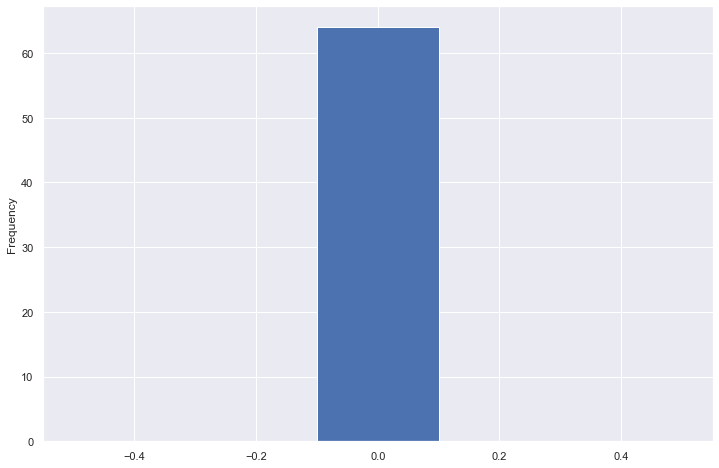

In [44]:
#Verificando percentual de dados faltantes
cons.percentual.plot.hist(bins=5)

In [79]:
cons

colunas    tipos  missing   size  unicos  percentual    completa
var1     var1    int64        0  14123      29        0.00    completa
var2     var2  float64      599  14123      84        0.04  incompleta
var3     var3  float64      599  14123    2442        0.04  incompleta
var4     var4  float64      936  14123   13093        0.07  incompleta
var5     var5    int64        0  14123    6296        0.00    completa
var6     var6  float64     1871  14123    1778        0.13  incompleta
var7     var7  float64     1895  14123      32        0.13  incompleta
var8     var8  float64     2214  14123      28        0.16  incompleta
var9     var9  float64     1534  14123       3        0.11  incompleta
var10   var10  float64     2339  14123      60        0.17  incompleta
var11   var11  float64     1719  14123   12383        0.12  incompleta
var12   var12  float64     2104  14123    5269        0.15  incompleta
var13   var13    int64        0  14123    1499        0.00    completa
var14   var14    int64        0  14123      28        0.00    completa
var15   var15  float64     1375  14123      76        0.10  incompleta
var19   var19    int64        0  14123    1201        0.00    completa
var20   var20    int64        0  14123      28        0.00    completa
var21   var21    int64        0  14123    1534        0.00    completa
var22   var22    int64        0  14123       6        0.00    completa
var23   var23    int64        0  14123       5        0.00    completa
var24   var24    int64        0  14123       3        0.00    completa
var25   var25    int64        0  14123       5        0.00    completa
var26   var26  float64     1571  14123      10        0.11  incompleta
var27   var27    int64        0  14123       2        0.00    completa
var28   var28    int64        0  14123      28        0.00    completa
var29   var29    int64        0  14123       6        0.00    completa
var30   var30    int64        0  14123       3        0.00    completa
var31   var31    int64        0  14123       2        0.00    completa
var32   var32    int64        0  14123      24        0.00    completa
var33   var33    int64        0  14123       7        0.00    completa
var34   var34    int64        0  14123      69        0.00    completa
var35   var35    int64        0  14123     567        0.00    completa
var36   var36    int64        0  14123      33        0.00    completa
var37   var37    int64        0  14123      47        0.00    completa
var38   var38    int64        0  14123      29        0.00    completa
var39   var39    int64        0  14123       6        0.00    completa
var40   var40    int64        0  14123      21        0.00    completa
var41   var41    int64        0  14123      10        0.00    completa
var42   var42    int64        0  14123      31        0.00    completa
var43   var43    int64        0  14123      20        0.00    completa
var44   var44    int64        0  14123       2        0.00    completa
var45   var45    int64        0  14123      16        0.00    completa
var46   var46    int64        0  14123      15        0.00    completa
var47   var47    int64        0  14123       6        0.00    completa
var48   var48    int64        0  14123      10        0.00    completa
var49   var49    int64        0  14123       2        0.00    completa
var50   var50    int64        0  14123       2        0.00    completa
var51   var51    int64        0  14123       2        0.00    completa
var53   var53    int64        0  14123       4        0.00    completa
var54   var54    int64        0  14123       4        0.00    completa
var55   var55  float64        0  14123   14003        0.00    completa
var57   var57  float64     1589  14123      20        0.11  incompleta
var58   var58  float64     1571  14123    8093        0.11  incompleta
var59   var59  float64     2182  14123    8813        0.15  incompleta
var60   var60  float64     6484  14123    6776        0.46  incompleta
var61   var61  float64      34

In [58]:
print(f'Contagem de colunas com até 20% de dados faltantes: {cons[cons.percentual<0.20].shape[0]}')
print(f'Contagem de colunas com até 0 de dados faltantes:  {cons[cons.percentual==0].shape[0]}')


Contagem de colunas com até 20% de dados faltantes: 61
Contagem de colunas com até 0 de dados faltantes:  44


In [47]:
cons[cons['percentual'] == 0 ]['tipos'].value_counts()


int64      52
float64    12
Name: tipos, dtype: int64

In [75]:
cons['completa'] = ['completa' if x==0 else 'incompleta' for x in cons['percentual']]

In [76]:
mantem = list(cons[cons['completa'] == 'completa']['colunas'])
df = df[mantem]

### Exploração 

var5


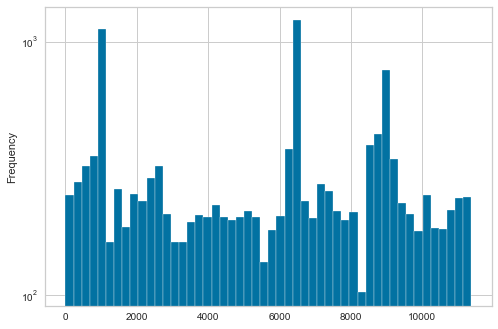

var13


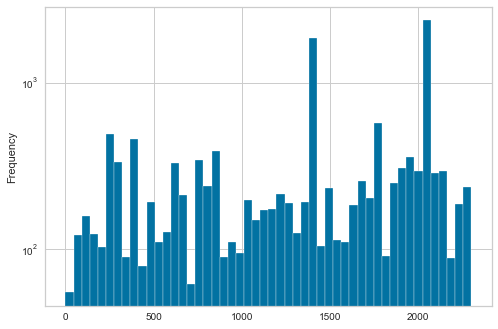

var14


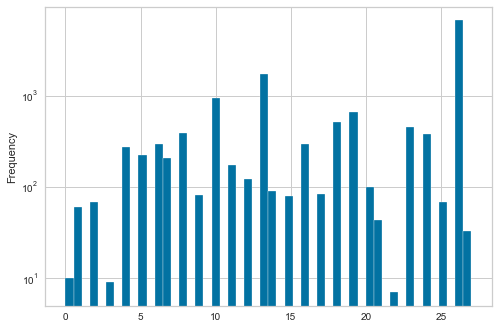

var19


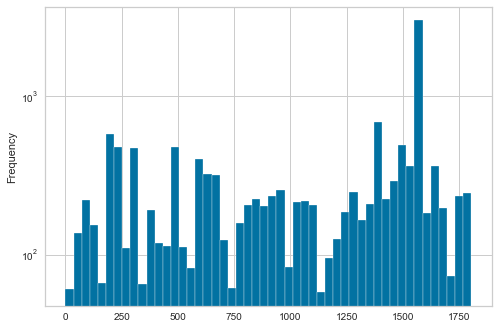

In [62]:
for coluna in df.columns[1:5]:
    print(coluna)
    df[coluna].plot.hist(bins=50, log = True)
    plt.show()

<AxesSubplot:>

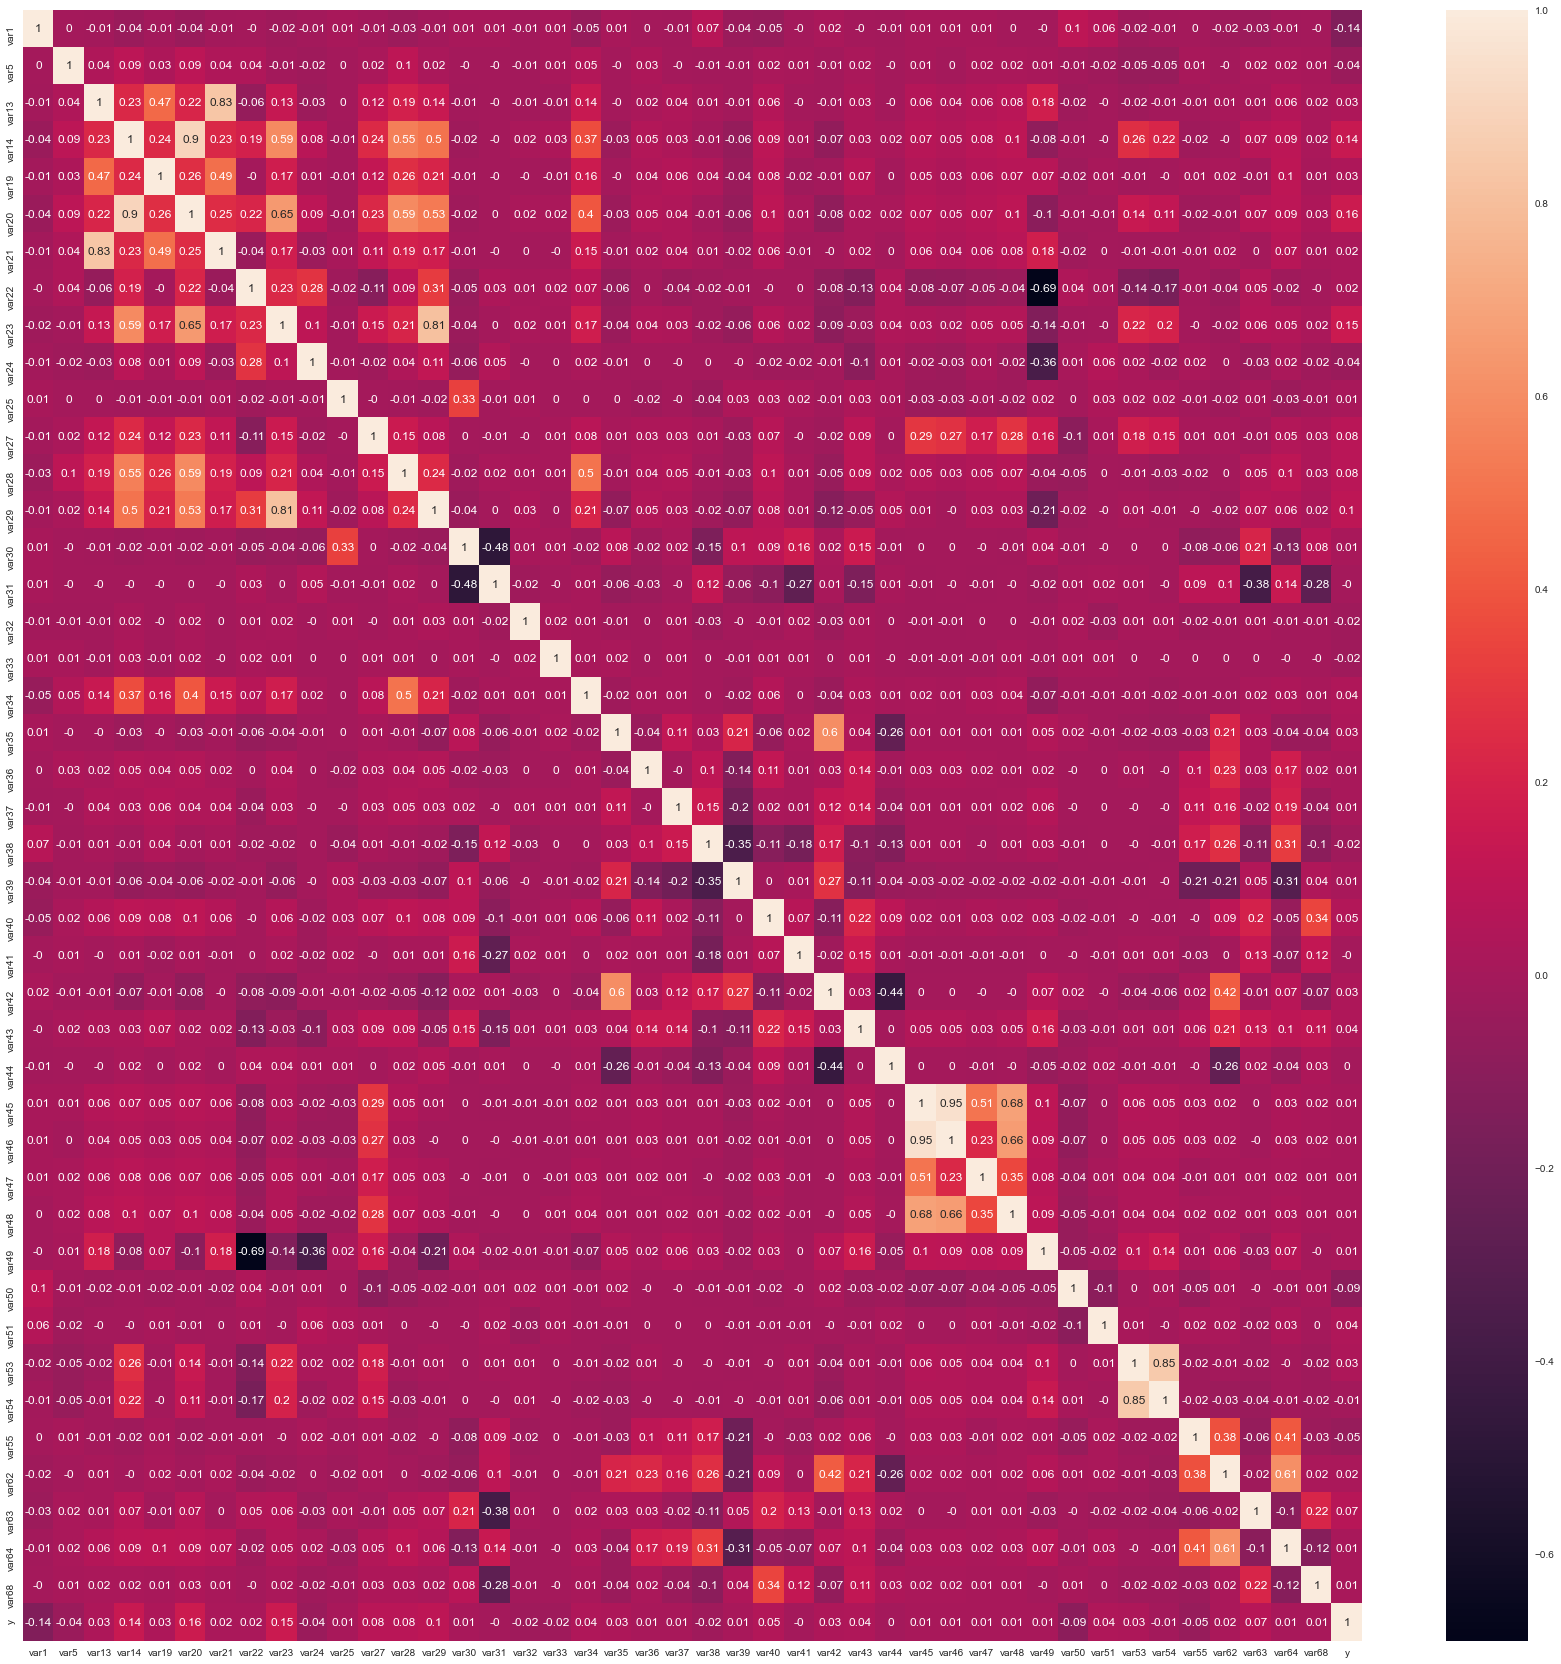

In [63]:
#Verificando correlação entre as variáveis
plt.figure(figsize=(30,30))
sns.heatmap(df.corr().round(2), annot=True)

## Analisando com a yellowbrick

In [52]:
#! pip install yellowbrick

In [87]:
# Removendo coluna ID
#df.drop(['id'],axis = 1,inplace=True)
y_train = df['y']
X_train = df.drop(columns=['y','var68'])

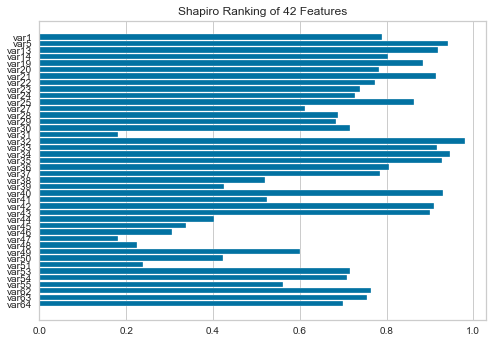

<AxesSubplot:title={'center':'Shapiro Ranking of 42 Features'}>

In [81]:
from yellowbrick.features import Rank1D

visualizer=  Rank1D(algorithm='shapiro')
visualizer.fit(X_train, y_train)
visualizer.transform(X_train)
visualizer.show()

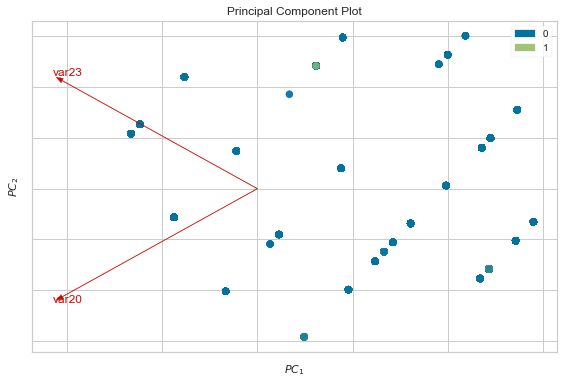

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [107]:
from yellowbrick.features import PCA
colunas = ['var23','var20']
visualizer = PCA(scale=True, proj_features = True, projection = 2)
visualizer.fit_transform(X_train[colunas], y_train)
#visualizer.transform(X_train)
visualizer.show()



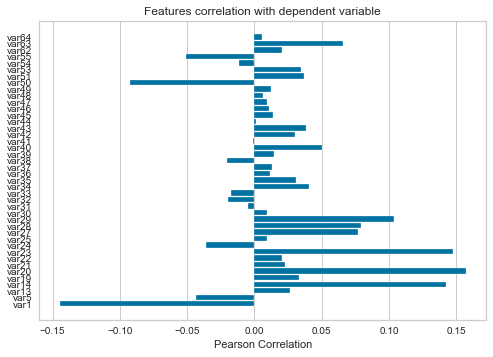

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [104]:
from yellowbrick.target import FeatureCorrelation

features = list(X_train.columns)

visualizer= FeatureCorrelation(labels=features)
visualizer.fit(X_train, y_train)
visualizer.show()


In [108]:
## Treinando o modelo
from sklearn.linear_model import LinearRegression

In [110]:
reg = LinearRegression()

LinearRegression()

In [111]:
reg.fit(X_train, y_train)

LinearRegression()

In [113]:
colunas_treinamento = X_train.columns

In [132]:
X_test = pd.read_csv('data/test.csv')
y_test = pd.read_csv('data/submission_sample.csv')

In [133]:
y_test = y_test['predicted']

In [134]:
X_test = X_test[colunas_treinamento].fillna(df[colunas_treinamento].mean())

In [136]:
y_pred = reg.predict(X_test[colunas_treinamento].fillna(df[colunas_treinamento].mean()))

In [131]:
from sklearn.metrics import mean_squared_error

In [137]:
erro_normal = mean_squared_error(y_pred= y_pred, y_true = y_test)

In [139]:
erro_normal

0.350642418471169

### Aplicando Feature Selection

In [146]:
from sklearn.feature_selection import RFE

In [150]:
rfe = RFE(reg)

In [151]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression())

In [152]:
pd.DataFrame({
    'colunas':X_train.columns,
    'bool':rfe.get_support(),
    'coefiecientes':pd.Series(reg.coef_)
})

colunas   bool  coefiecientes
0     var1   True  -7.217399e-03
1     var5  False  -6.611263e-06
2    var13  False   5.116016e-06
3    var14  False   1.467474e-03
4    var19  False   7.987949e-07
5    var20   True   4.571129e-03
6    var21  False  -1.793642e-05
7    var22  False   3.180130e-03
8    var23   True   4.555073e-02
9    var24   True  -2.420845e-02
10   var25  False   2.944689e-03
11   var27   True   3.019677e-02
12   var28  False  -1.074080e-04
13   var29   True  -1.882448e-02
14   var30  False  -1.692769e-03
15   var31   True   4.494592e-02
16   var32  False  -1.794531e-03
17   var33  False  -3.677675e-03
18   var34  False  -3.970748e-04
19   var35  False   3.011032e-05
20   var36  False  -1.783180e-05
21   var37  False   4.641847e-05
22   var38  False  -9.285147e-04
23   var39  False  -1.996297e-03
24   var40  False   1.302101e-03
25   var41  False  -4.670212e-03
26   var42  False   4.494861e-03
27   var43  False   2.151040e-03
28   var44   True   1.491738e-02
29   var45   True   4.805749e-02
30   var46   True  -4.550897e-02
31   var47   True  -5.319500e-02
32   var48   True  -1.965585e-02
33   var49   True   1.633237e-02
34   var50   True  -8.089293e-02
35   var51   True   6.800392e-02
36   var53   True   5.259007e-02
37   var54   True  -7.954142e-02
38   var55   True  -1.074474e+00
39   var62   True   1.104346e-01
40   var63   True   7.924371e-02
41   var64   True   1.044047e-01

In [153]:
X_train_importante = rfe.transform(X_train)
X_test_importante = rfe.transform(X_test)

In [154]:
reg.fit(X_train_importante,y_train)

LinearRegression()

In [155]:
y_pred_imp = reg.predict(X_test_importante)

In [156]:
error_imp = mean_squared_error(y_pred = y_pred_imp, y_true = y_test)

In [157]:
error_imp

0.3492501340779847

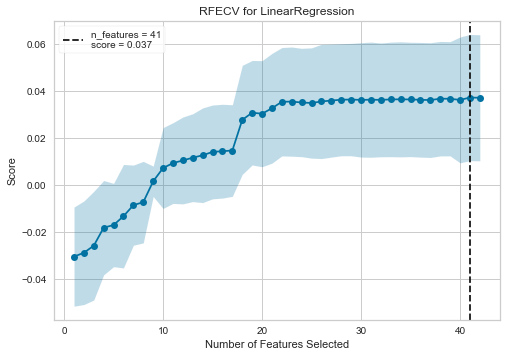

<AxesSubplot:title={'center':'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [158]:
from yellowbrick.model_selection import RFECV

visualizer= RFECV(reg)
visualizer.fit(X_train,y_train)
visualizer.show()

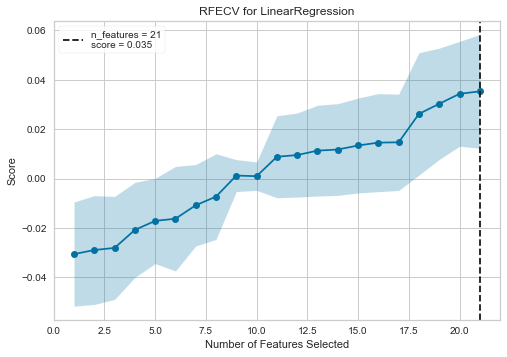

<AxesSubplot:title={'center':'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [159]:
from yellowbrick.model_selection import RFECV

visualizer= RFECV(reg)
visualizer.fit(X_train_importante,y_train)
visualizer.show()

### Aplicando PCA

In [160]:
from sklearn.decomposition import PCA

In [161]:
pca = PCA(0.95)

In [162]:
pca.fit(X_train)

PCA(n_components=0.95)

In [163]:
pca.explained_variance_ratio_

array([0.90172838, 0.0737249 ])

In [164]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [165]:
reg = LinearRegression()

In [167]:
reg.fit(X_train_pca,y_train)

LinearRegression()

In [168]:
y_pred_pca = reg.predict(X_test_pca)

In [174]:
error_normal_pca = mean_squared_error(y_pred = y_pred_pca, y_true = y_test)

In [175]:
error_normal_pca

0.33914276441407487

<AxesSubplot:>

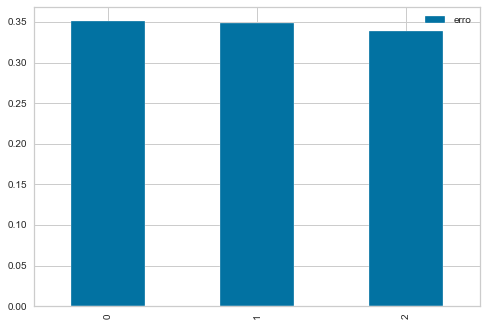

In [177]:
pd.DataFrame({
    'erro': [erro_normal, error_imp, error_normal_pca]
    
    
}).plot(kind='bar', log=False)